# Analysis of the projected estimation

In [1]:
%matplotlib inline

import numpy as np
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import datetime

import sys
sys.path.append('C:\\projects\\finances.git\\finances')

from market import market_data as mkt_data

C:\Anaconda3\envs\finance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Get real returns for two timeframes

In [30]:
mkt=mkt_data.MarketData()
short_rets = mkt.crypto_returns_data(
    symbols=['ADA', 'XMR', 'ADST', 'BTC', 'BIS', 'NEO', 'EMC2', 'ETH', 'FUN', 'IOTA', 'LTC', 'TRX', 'UBQ', 'XLM', 'XRP'],
    time_step='10T',
    start_date = datetime.datetime.today() - datetime.timedelta(days=8)
)

real_proj_rets = mkt.crypto_returns_data(
    symbols=['ADA', 'XMR', 'ADST', 'BTC', 'BIS', 'NEO', 'EMC2', 'ETH', 'FUN', 'IOTA', 'LTC', 'TRX', 'UBQ', 'XLM', 'XRP'],
    time_step='H',
    start_date = datetime.datetime.today() - datetime.timedelta(days=8)
)

Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [31]:
short_rets.head()

,ADA,XMR,ADST,BTC,BIS,NEO,EMC2,ETH,FUN,IOTA,LTC,TRX,UBQ,XLM,XRP
2018-01-27 02:00:00,-0.004152,-0.001141,-0.011990,-0.000930,-0.012940,-0.004286,-0.012823,-0.003435,-0.007205,0.001649,-0.002152,-0.003425,0.002991,-0.008699,-0.002076
2018-01-27 02:10:00,-0.000770,-0.002821,0.009995,-0.001320,-0.013020,-0.001946,-0.002813,-0.000776,0.006651,-0.002863,-0.000137,-0.000285,-0.009809,-0.000914,-0.007580
2018-01-27 02:20:00,-0.000203,-0.004605,0.004209,-0.001666,-0.003519,0.001603,0.008200,0.000556,-0.003700,0.001324,-0.000388,-0.001448,-0.021161,0.003594,0.003463
2018-01-27 02:30:00,0.009924,0.008817,0.008795,0.008978,0.014614,0.009785,0.014531,0.007375,0.015962,0.012368,0.005486,0.009498,0.014292,0.011231,0.006233
2018-01-27 02:40:00,-0.000708,-0.000594,0.002980,0.000413,-0.005033,-0.000051,-0.007425,0.001008,0.003584,0.005953,-0.000210,-0.004907,0.004597,0.001719,-0.003263


In [32]:
real_proj_rets.head()

,ADA,XMR,ADST,BTC,BIS,NEO,EMC2,ETH,FUN,IOTA,LTC,TRX,UBQ,XLM,XRP
2018-01-27 03:00:00,0.005850,-0.004389,0.022295,0.005876,0.001577,0.005110,0.002890,0.007398,0.020917,0.001695,0.003380,0.004222,-0.006840,0.005379,0.005402
2018-01-27 04:00:00,-0.004634,-0.003257,-0.000472,-0.001976,0.014723,-0.005418,-0.004017,-0.000500,0.005423,-0.006651,-0.001878,-0.005924,0.014873,-0.001651,-0.002581
2018-01-27 05:00:00,0.003826,-0.001273,-0.007875,0.001102,-0.016307,0.001319,0.009492,0.001799,0.011609,-0.001038,0.003828,0.002736,-0.000697,0.002221,-0.000209
2018-01-27 06:00:00,0.021127,0.018118,0.016270,0.016655,-0.011975,0.015703,0.010310,0.014017,-0.007311,0.016844,0.026855,0.028035,0.001018,0.009991,0.019870
2018-01-27 07:00:00,-0.005095,-0.005628,-0.010738,-0.005426,-0.000910,-0.003337,-0.006813,-0.004453,-0.000185,0.004006,-0.005433,0.002676,-0.006821,-0.000359,-0.009329


## Analyse the distributions

We now plot the distribution of these random variables by defining its pdf and compare with the actual sample available.

In [36]:
proj_rets = pd.DataFrame()

n_steps = 6
x_max = 0.2
x = np.linspace(-x_max,x_max,100)

### Project using normal distribution properties

In this approach, we fit the returns to a normal distribution. Then, because a sum of N normal distributions is a normal distribution with

$$\mu_N = N \mu_0$$
$$\sigma_N = \sqrt{N} \sigma_0$$

We calculate the distribution for (daily) distribution of the $N$ (24) sums of short periods (hours), as a normal
$$N(N\mu_0, \sqrt{N}\sigma_0)$$.

Next is plotted the comparison between the:
* The PDF of the MLE normal distribution of the short period compared with the actual histogram of the actual data.

* Projected distribution for the returns in N steps later, obtained from the previously estimated normal, with the histogram of the actual data.

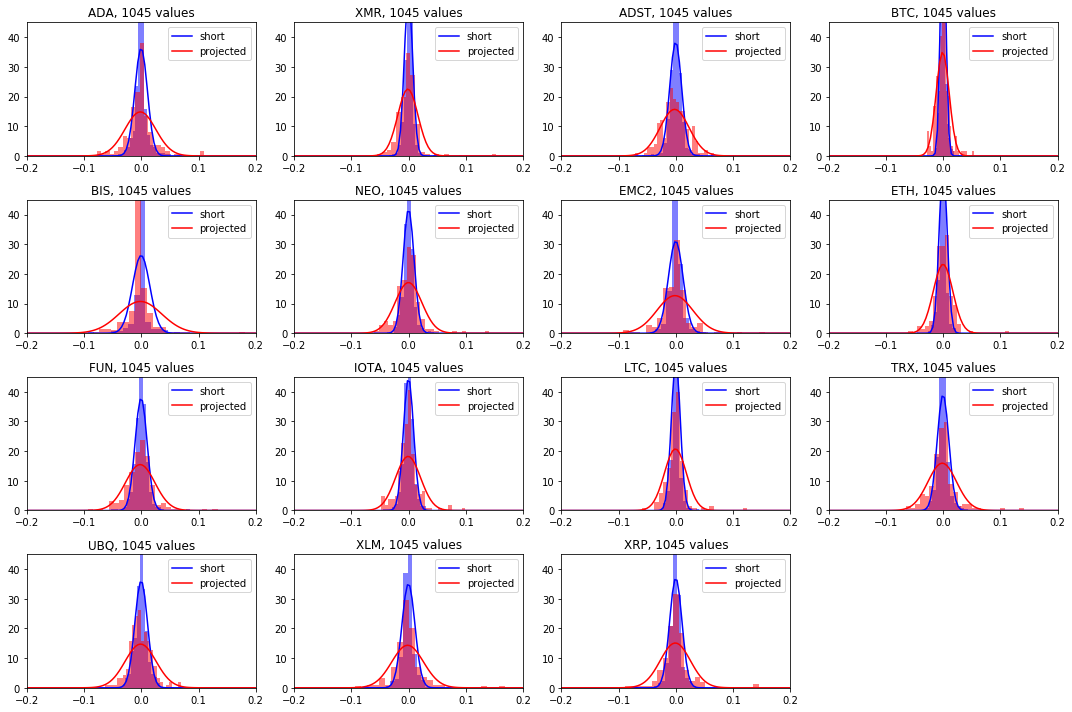

In [44]:
fig = plt.figure(figsize=(15,10))
f = 1
for r in short_rets.columns:
    rets = short_rets[r].dropna()
    # MLE returns to a normal distribution
    short_mu, short_std = norm.fit(rets)
    # project to the normal of sum of n_steps
    proj_mu, proj_std = n_steps*short_mu, short_std*np.sqrt(n_steps)
    
    # get the two pdf
    p_short = norm.pdf(x, short_mu, short_std)
    p_proj = norm.pdf(x, proj_mu, proj_std)
    
    fig.add_subplot(4,4,f)
    ax = plt.gca()
    plt.plot(x, p_short, 'b', label='short')
    plt.plot(x, p_proj, 'r', label='projected')
    plt.hist(short_rets[r], color='b', bins=25, normed=True, alpha=0.5)
    plt.hist(real_proj_rets[r], color='r', bins=25, normed=True, alpha=0.5)

    f+=1
    ax.set_title('{}, {} values'.format(r, len(rets)))
    ax.set_ylim(0,45)
    ax.set_xlim(-x_max,x_max)
    plt.legend()
plt.tight_layout()

### With actual KDE estimation

In this approach, we use the KDE estimator to estimate the distribution of the data.

However, because we dont know which is the distribution and it is a purely numerical functions, we estimate the projected distribution by doing the following steps:
1) Estimate the original short period distribution using KDE, given by $X$.

2) Generate N random samples with the probability distribution obtain in the KDE

3) Sum those N samples to get the sample of the sum of $\sum_i X_